## Analyse et traitement des données

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [2]:
# Charger les données

from google.colab import files
import pandas as pd

# Téléverser un fichier manuellement
uploaded = files.upload()

# Lire le fichier (nom à ajuster selon ce qui est téléversé)
df = pd.read_csv("atp_matches_2023.csv")

# Afficher les premières lignes
df.head()

Saving atp_matches_2023.csv to atp_matches_2023.csv


,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2023-9900,United Cup,Hard,18,A,20230102,300,126203,3.0,NaN,...,62.0,47.0,15.0,12.0,9.0,9.0,9.0,3355.0,16.0,2375.0
1,2023-9900,United Cup,Hard,18,A,20230102,299,126207,NaN,NaN,...,12.0,8.0,3.0,4.0,1.0,3.0,19.0,2000.0,23.0,1865.0
2,2023-9900,United Cup,Hard,18,A,20230102,296,126203,3.0,NaN,...,62.0,51.0,7.0,12.0,2.0,2.0,9.0,3355.0,10.0,2905.0
3,2023-9900,United Cup,Hard,18,A,20230102,295,126207,NaN,NaN,...,41.0,26.0,12.0,9.0,6.0,9.0,19.0,2000.0,245.0,220.0
4,2023-9900,United Cup,Hard,18,A,20230102,292,126774,1.0,NaN,...,58.0,48.0,18.0,16.0,1.0,2.0,4.0,5550.0,16.0,2375.0


# Vérification des variables

In [7]:
df.winner_ioc.unique()  # nationalité du vainqueur

array(['USA', 'GRE', 'ITA', 'CRO', 'GBR', 'BUL', 'POL', 'SUI', 'KAZ',
       'CZE', 'GER', 'AUS', 'NOR', 'BRA', 'FRA', 'SRB', 'RUS', 'JPN',
       'CAN', 'ESP', 'NED', 'BEL', 'KOR', 'SWE', 'CHN', 'RSA', 'HUN',
       'ARG', 'SVK', 'FIN', 'DEN', 'CHI', 'BOL', 'POR', 'ECU', 'MDA',
       'GEO', 'PER', 'AUT', 'COL', 'BLR', 'TPE', 'BIH', 'JOR', 'EST',
       'TUR', 'ISR', 'UKR', 'IND', 'LAT', 'LTU', 'THA', 'ROU', 'LBN',
       'IRL', 'ESA', 'HKG', 'MAR', 'LIB', 'MEX', 'MON', 'PAK', 'LUX',
       'SLO', 'EGY', 'URU', 'BAR', 'NMI', 'JAM', 'INA', 'VIE', 'CYP',
       'TUN'], dtype=object)

In [8]:
df.tourney_level.unique()  # type de tournoi

array(['A', 'G', 'M', 'F', 'D'], dtype=object)

In [9]:
df.winner_age.unique() # age du vainqueur

array([25.1, 24.9, 24.3, 20.8, 24.8, 26.7, 27.3, 18.3, 29.4, 31.6, 25.8,
       26.5, 21.9, 37.7, 21.1, 23.8, 29.6, 32.6, 24. , 26.1, 27.4, 34.5,
       35.6, 22.4, 26.8, 27.2, 23.7, 26.6, 21.3, 23.4, 25.4, 23.3, 21. ,
       34.7, 27.7, 29.3, 34.2, 25.6, 30.8, 27.5, 29.7, 30.2, 20.6, 36.5,
       30.6, 22.2, 27.6, 32. , 26.2, 28.8, 20.2, 23.5, 35.7, 33.5, 36.6,
       17.9, 25.9, 29.9, 22.5, 24.7, 26.9, 24.4, 21.8, 30.9, 21.4, 25.2,
       35.9, 30.4, 24.5, 19.7, 31.5, 23.9, 27.8, 25. , 25.7, 23.6, 22.1,
       35. , 21.2, 33.8, 32.7, 20.9, 26. , 30.3, 32.3, 24.1, 29.5, 34.6,
       31.1, 28.7, 33.2, 18.6, 28.9, 31.2, 33.6, 29.8, 27. , 31.7, 37.8,
       25.3, 34.8, 29.1, 37.9, 32.2, 29. , 19.8, 30. , 21.5, 41.4, 24.2,
       31. , 35.8, 24.6, 30.1, 32.8, 20.4, 22. , 36.7, 30.5, 27.1, 26.3,
       31.8, 27.9, 22.6, 33. , 21.6, 32.9, 26.4, 34. , 18.8, 31.3, 19.9,
       19.6, 34.9, 38. , 31.9, 20.5, 22.3, 28. , 31.4, 18.9, 19.4, 33.4,
       36.8, 25.5, 35.2, 20. , 21.7, 29.2, 38.1, 32

In [10]:
df.score.unique()

array(['7-6(4) 7-6(6)', '6-2 0-0 RET', '7-6(5) 7-6(5)', ...,
       '4-6 6-4 6-0', '7-6(7) DEF', '6-1 3-6 6-2'], dtype=object)

In [11]:
df.best_of.unique() # 3 sets ou 5 sets max

array([3, 5])

In [14]:
df.minutes.unique() # temps du match

array([135.,  34., 104.,  79., 155.,  62., 151.,  89., 116.,  57., 136.,
       132.,  78., 133.,  nan,  67., 102.,  87.,  99.,  72., 129., 131.,
        90.,  64.,  75.,  80.,  92., 109., 162., 164., 139., 110., 115.,
        86., 108.,  71., 113., 170., 128.,  97., 189.,  74.,  77., 166.,
        81.,  91., 122.,  73.,  95., 112.,  76.,  94., 120.,  68.,  85.,
        65., 125.,  40., 177., 114., 149.,   0., 130.,  93., 100.,  55.,
       148.,  63., 144.,  88.,  61.,  98., 147., 123., 127.,  48., 165.,
       145.,  70., 138., 119.,  82.,  53., 157., 154., 105.,  60., 117.,
       118., 180., 140.,  84., 143., 101., 221., 242., 176., 199., 197.,
       194., 103., 245.,  96., 265., 212., 228., 257., 142., 188., 126.,
       254., 262., 238., 209., 182., 203., 196., 183., 121., 158., 111.,
       266., 211., 235., 204., 263., 246., 289., 192., 195., 152., 107.,
       173., 233., 124., 185., 193., 191., 174., 251., 208., 184., 206.,
       345., 230., 217., 179., 213., 187., 240., 22

In [15]:
df.w_df.unique() # différence de jeux

array([ 2.,  1.,  0.,  4.,  7.,  3.,  6.,  5.,  9.,  8., nan, 14., 11.,
       10., 13., 15., 12.])

In [16]:
df.w_svpt.unique() # point gagnés sur son service du vainqueur

array([ 85.,  27.,  80.,  61.,  98.,  41.,  94.,  50.,  77.,  31.,  91.,
        87.,  86.,  95.,  36.,  72.,  48.,  62.,  52.,  78.,  63.,  99.,
        45.,  56.,  68.,  55.,  67., 100.,  88.,  73.,  64.,  60.,  69.,
        49.,  59.,  65., 110.,  44.,  81.,  66.,  40.,  70.,  51., 106.,
        76.,  53.,  57.,  83.,  47.,  74.,  35.,  79.,  20., 101.,  nan,
        58.,  54.,  93.,  43., 103.,  89.,  39., 118.,  82.,  42.,  26.,
       104., 121., 107., 109.,  84.,  46.,  92., 136.,  96., 119., 156.,
        90., 128., 129., 122., 111., 105., 171., 191.,  97., 168., 173.,
       162., 113., 155., 154., 130., 140., 157., 116., 120., 149., 102.,
       174., 143., 152., 142., 145., 172., 138., 133., 117., 151.,  71.,
       123., 176., 163., 135., 183., 158., 137., 112., 108., 169., 125.,
       126.,  75.,  38., 114.,  33.,  18.,  16.,  14.,  19., 131.,  34.,
        13.,  28.,   5.,  25.,  15.,  29.,  37., 134.,  21.,  10., 127.,
       144., 167., 132., 148., 192., 166., 177., 22

In [17]:
df.w_1stIn.unique() # nombre de 1e balle de service dedans du vainqueur

array([ 52.,  19.,  50.,  37.,  25.,  60.,  30.,  49.,  18.,  69.,  46.,
        39.,  72.,  20.,  48.,  33.,  32.,  31.,  58.,  55.,  34.,  67.,
        27.,  41.,  36.,  47.,  35.,  62.,  57.,  42.,  43.,  40.,  51.,
        23.,  75.,  38.,  29.,  45.,  54.,  14.,  76.,  61.,  71.,  nan,
        22.,  70.,  26.,  21.,  44.,  77.,  64.,  59.,  15.,  66.,  24.,
        86.,  53.,  56.,  99.,  78., 104.,  68.,  92.,  81.,  94., 116.,
       121., 111., 106.,  95.,  85., 109., 128.,  90.,  96.,  88., 114.,
       103.,  89.,  82., 107., 120.,  87.,  63.,  79., 117.,  84., 100.,
        74.,  80., 105.,  65.,  28.,  73.,  11.,  10.,   8.,  83.,   4.,
         9.,  16.,   3.,  12.,  13.,  17., 122.,  98., 108., 129., 124.,
        97.,  93., 130., 112., 142., 110., 102., 126., 101., 115., 140.,
       118., 113.,  91.,   6.])

In [18]:
df.w_1stWon.unique() # nombre de point gagnés sur la 1e balle de service du vainqueur

array([ 45.,  15.,  44.,  31.,  43.,  18.,  27.,  37.,  17.,  53.,  32.,
        56.,  38.,  21.,  25.,  52.,  29.,  48.,  26.,  24.,  36.,  23.,
        39.,  41.,  42.,  30.,  22.,  35.,  40.,  57.,  33.,  49.,  16.,
        34.,  14.,  59.,  54.,  nan,  47.,  28.,  11.,  50.,  20.,  64.,
        81.,  72.,  68.,  46.,  79.,  51.,  90.,  71.,  80.,  66.,  83.,
        82.,  70.,  65.,  58.,  95.,  89.,  86.,  69.,  60.,  78.,  62.,
        55.,  61.,  92.,  63.,  77.,  88.,  19.,  10.,  13.,   6.,   9.,
         1.,   3.,   8.,  12.,   7.,  75.,  94.,  84.,  98.,  76.,  67.,
        99.,  73.,  85., 100.,  74.,  91.,  87.])

In [20]:
df.w_2ndWon.unique() # nombre de point gagnés sur la 2e balle de service du vainqueur

array([16.,  3., 19., 11., 28., 12., 20., 18.,  9., 24., 21., 23., 14.,
       10.,  8., 15., 17.,  7., 25., 13.,  2., nan,  6., 27.,  5., 26.,
       31., 30., 33., 32., 22., 37., 34., 36., 29., 35.,  4.,  1., 43.,
       45., 44., 41., 40., 39., 38.])

In [22]:
df.w_bpSaved.unique() # nombre de balle de break sauvées par le vainqueur

array([ 0.,  3.,  4.,  5.,  1.,  2.,  7.,  8.,  6.,  9., nan, 14., 11.,
       10., 12., 17., 13., 21., 15., 22., 18., 19.])

In [23]:
df.w_bpFaced.unique() # nombre de balle de break contre le vainqueur

array([ 0.,  3.,  4.,  5.,  2.,  1.,  6.,  8., 10.,  9.,  7., 12., nan,
       11., 18., 20., 13., 15., 21., 16., 26., 17., 14., 19., 22., 24.])

In [ ]:
# Afficher les premières lignes
display(df.head())

print(df.columns)



,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2023-9900,United Cup,Hard,18,A,20230102,300,126203,3.0,NaN,...,62.0,47.0,15.0,12.0,9.0,9.0,9.0,3355.0,16.0,2375.0
1,2023-9900,United Cup,Hard,18,A,20230102,299,126207,NaN,NaN,...,12.0,8.0,3.0,4.0,1.0,3.0,19.0,2000.0,23.0,1865.0
2,2023-9900,United Cup,Hard,18,A,20230102,296,126203,3.0,NaN,...,62.0,51.0,7.0,12.0,2.0,2.0,9.0,3355.0,10.0,2905.0
3,2023-9900,United Cup,Hard,18,A,20230102,295,126207,NaN,NaN,...,41.0,26.0,12.0,9.0,6.0,9.0,19.0,2000.0,245.0,220.0
4,2023-9900,United Cup,Hard,18,A,20230102,292,126774,1.0,NaN,...,58.0,48.0,18.0,16.0,1.0,2.0,4.0,5550.0,16.0,2375.0


Index(['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level',
       'tourney_date', 'match_num', 'winner_id', 'winner_seed', 'winner_entry',
       'winner_name', 'winner_hand', 'winner_ht', 'winner_ioc', 'winner_age',
       'loser_id', 'loser_seed', 'loser_entry', 'loser_name', 'loser_hand',
       'loser_ht', 'loser_ioc', 'loser_age', 'score', 'best_of', 'round',
       'minutes', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon',
       'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df', 'l_svpt',
       'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced',
       'winner_rank', 'winner_rank_points', 'loser_rank', 'loser_rank_points'],
      dtype='object')


In [ ]:
# Vérifier les valeurs manquantes
missing_values = df.isnull().sum()
print("Valeurs manquantes par colonne :\n", missing_values)

# Sélection des colonnes pertinentes
cols = ['tourney_date', 'surface', 'winner_id', 'loser_id', 'w_ace', 'l_ace', 'winner_rank', 'loser_rank','tourney_name','winner_ht','loser_ht','winner_hand','loser_hand']
data = df[cols]

# Convertir tourney_date en format datetime
data['tourney_date'] = pd.to_datetime(data['tourney_date'], format='%Y%m%d')

# Remplacer les valeurs manquantes des classements par une valeur élevée (non classé)
data['winner_rank'].fillna(999, inplace=True)
data['loser_rank'].fillna(999, inplace=True)


Valeurs manquantes par colonne :
 tourney_id               0
tourney_name             0
surface                 53
draw_size                0
tourney_level            0
tourney_date             0
match_num                0
winner_id                0
winner_seed           1736
winner_entry          2513
winner_name              0
winner_hand              0
winner_ht               17
winner_ioc               0
winner_age               0
loser_id                 0
loser_seed            2217
loser_entry           2291
loser_name               0
loser_hand               0
loser_ht                32
loser_ioc                0
loser_age                2
score                    0
best_of                  0
round                    0
minutes                232
w_ace                  171
w_df                   171
w_svpt                 171
w_1stIn                171
w_1stWon               171
w_2ndWon               171
w_SvGms                171
w_bpSaved              171
w_bpFaced            

<ipython-input-44-82da10cfff5e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tourney_date'] = pd.to_datetime(data['tourney_date'], format='%Y%m%d')
<ipython-input-44-82da10cfff5e>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['winner_rank'].fillna(999, inplace=True)
<

# Premiers graphes d'information

                        tourney_date      winner_id       loser_id  \
count                           2986    2986.000000    2986.000000   
mean   2023-06-02 04:03:32.190221056  145036.088078  144006.518084   
min              2023-01-02 00:00:00  100644.000000  100644.000000   
25%              2023-03-06 00:00:00  106331.000000  106233.000000   
50%              2023-05-29 00:00:00  126205.000000  126205.000000   
75%              2023-08-21 00:00:00  200325.000000  200318.000000   
max              2023-11-27 00:00:00  212051.000000  212044.000000   
std                              NaN   42766.699797   42450.867025   

             w_ace        l_ace  winner_rank   loser_rank    winner_ht  \
count  2815.000000  2815.000000  2986.000000  2986.000000  2969.000000   
mean      6.956306     5.415631    81.769926   123.291695   187.552375   
min       0.000000     0.000000     1.000000     1.000000    71.000000   
25%       3.000000     2.000000    17.000000    36.000000   183.000000   

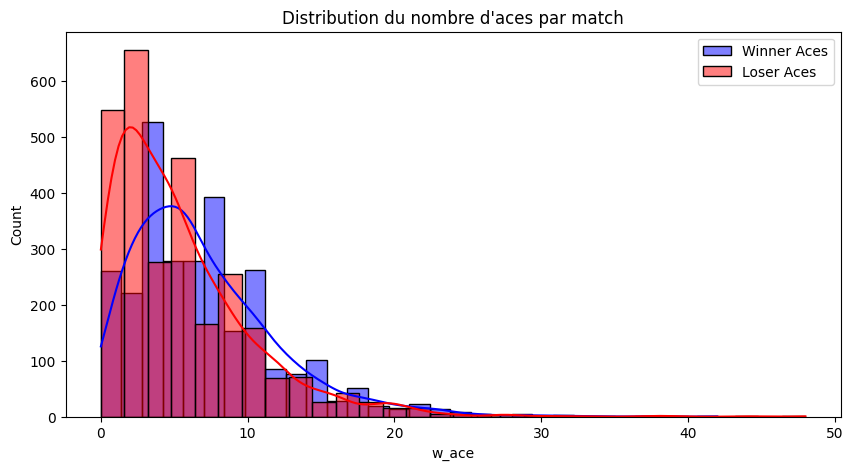

In [ ]:
# Créer des statistiques descriptives
print(data.describe())

# Visualisation de la distribution des aces
plt.figure(figsize=(10,5))
sns.histplot(data['w_ace'], bins=30, kde=True, color='blue', label='Winner Aces')
sns.histplot(data['l_ace'], bins=30, kde=True, color='red', label='Loser Aces')
plt.legend()
plt.title("Distribution du nombre d'aces par match")
plt.show()

# Sauvegarde des données nettoyées pour la modélisation
data.to_csv("processed_tennis_data.csv", index=False)


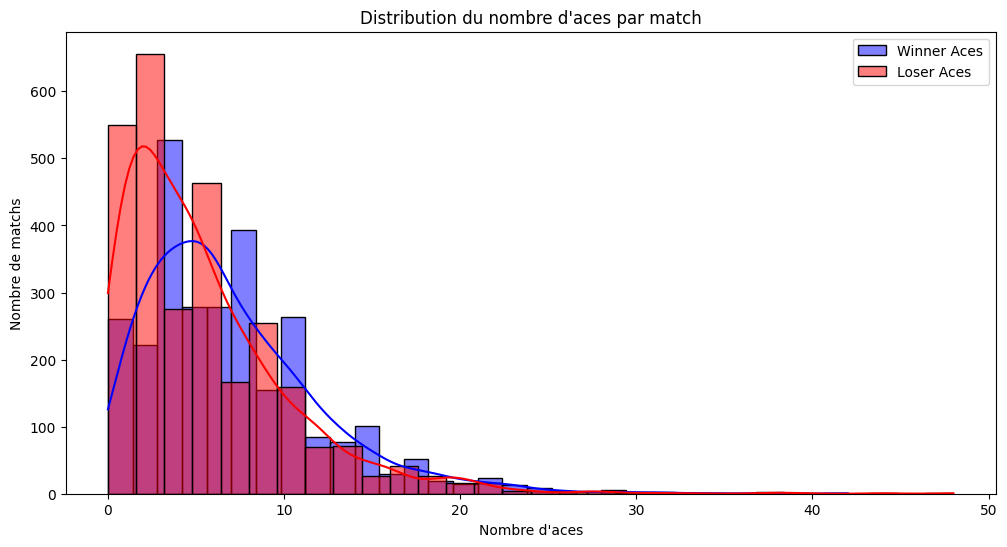

In [ ]:
# Visualisation de la distribution des aces
plt.figure(figsize=(12,6))
sns.histplot(data['w_ace'], bins=30, kde=True, color='blue', label='Winner Aces')
sns.histplot(data['l_ace'], bins=30, kde=True, color='red', label='Loser Aces')
plt.legend()
plt.title("Distribution du nombre d'aces par match")
plt.xlabel("Nombre d'aces")
plt.ylabel("Nombre de matchs")
plt.show()




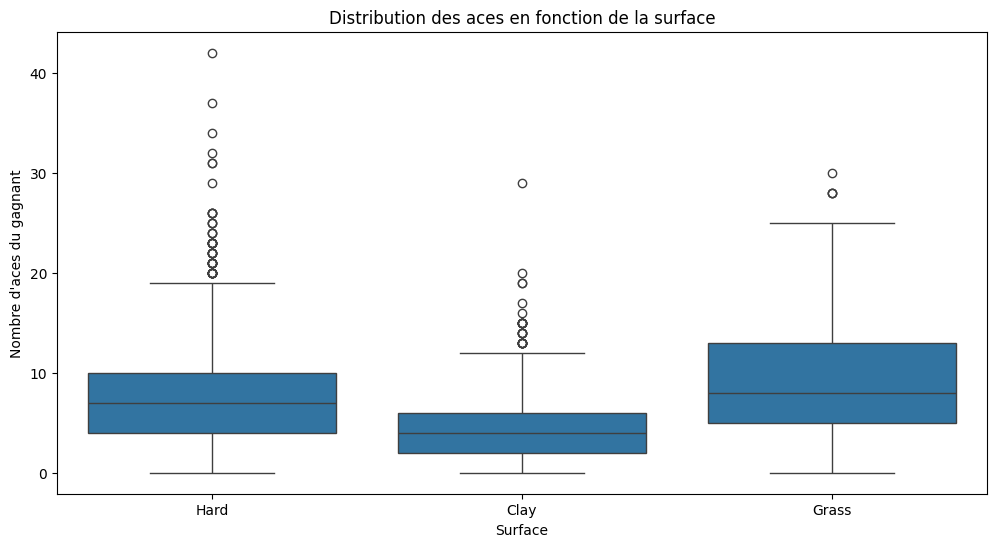

In [ ]:
# Distribution des aces par surface
plt.figure(figsize=(12,6))
sns.boxplot(x='surface', y='w_ace', data=data)
plt.title("Distribution des aces en fonction de la surface")
plt.xlabel("Surface")
plt.ylabel("Nombre d'aces du gagnant")
plt.show()



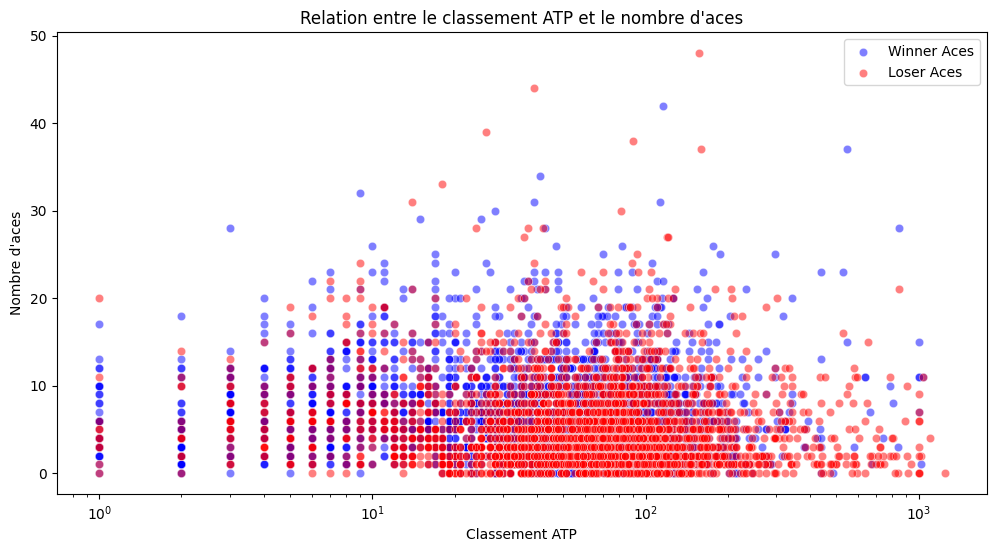

In [ ]:
# Impact du classement ATP sur les aces
plt.figure(figsize=(12,6))
sns.scatterplot(x='winner_rank', y='w_ace', data=data, alpha=0.5, color='blue', label='Winner Aces')
sns.scatterplot(x='loser_rank', y='l_ace', data=data, alpha=0.5, color='red', label='Loser Aces')
plt.xscale("log")
plt.xlabel("Classement ATP")
plt.ylabel("Nombre d'aces")
plt.title("Relation entre le classement ATP et le nombre d'aces")
plt.legend()
plt.show()


<ipython-input-11-fa3cd86f4632>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='tourney_date', y='w_ace', data=data, ci=None, label='Winner Aces')
<ipython-input-11-fa3cd86f4632>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='tourney_date', y='l_ace', data=data, ci=None, label='Loser Aces')


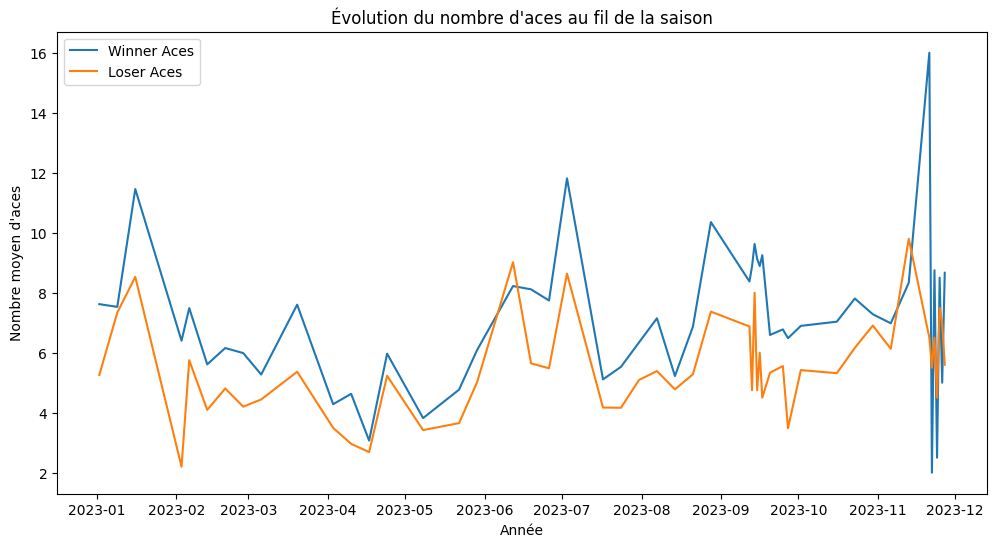

In [ ]:

# Tendance des aces en fonction du temps
# data['year'] = data['tourney_date'].dt.year
plt.figure(figsize=(12,6))
sns.lineplot(x='tourney_date', y='w_ace', data=data, ci=None, label='Winner Aces')
sns.lineplot(x='tourney_date', y='l_ace', data=data, ci=None, label='Loser Aces')
plt.xlabel("Année")
plt.ylabel("Nombre moyen d'aces")
plt.title("Évolution du nombre d'aces au fil de la saison")
plt.legend()
plt.show()



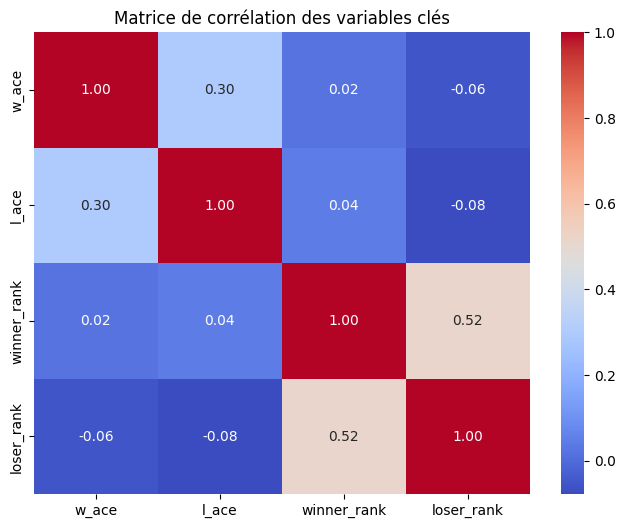

In [ ]:
# Corrélations entre classement et nb aces
correlation_matrix = data[['w_ace', 'l_ace', 'winner_rank', 'loser_rank']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matrice de corrélation des variables clés")
plt.show()

In [ ]:
data.columns

Index(['tourney_date', 'surface', 'winner_id', 'loser_id', 'w_ace', 'l_ace',
       'winner_rank', 'loser_rank', 'tourney_name', 'winner_ht', 'loser_ht',
       'winner_hand', 'loser_hand'],
      dtype='object')

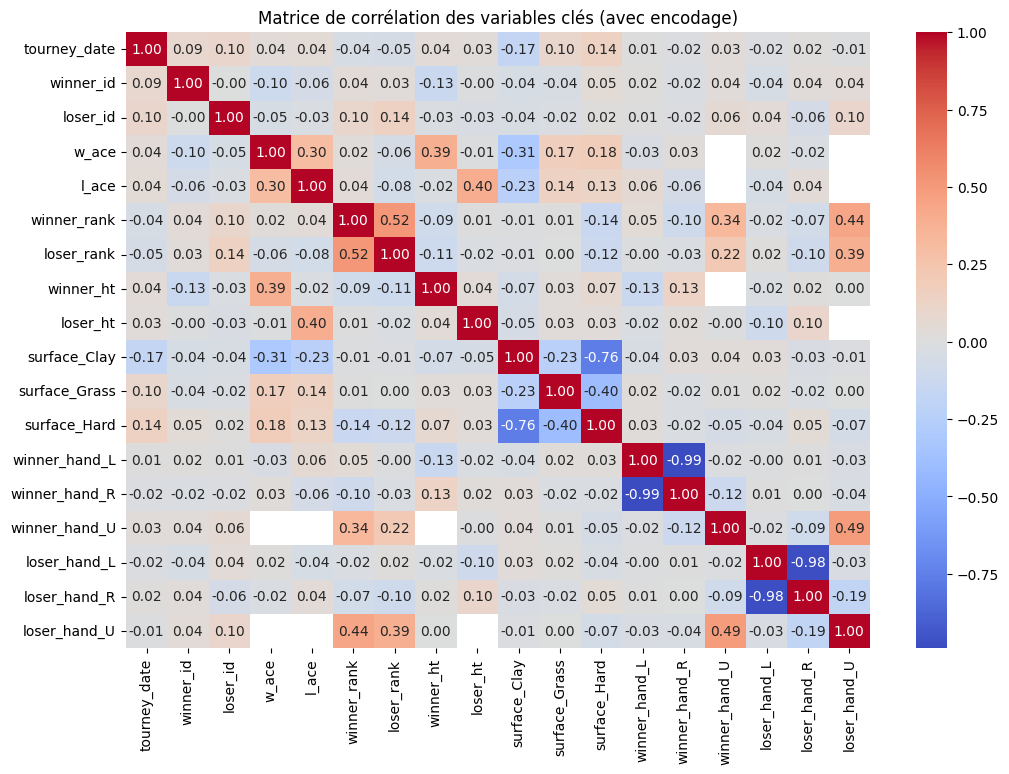

In [ ]:
# Encoder les variables catégorielles en one-hot
data_corr = data.drop(columns=['tourney_name'])
data_encoded = pd.get_dummies(data_corr, columns=['surface', 'winner_hand', 'loser_hand'])
# Calculer la matrice de corrélation
correlation_matrix = data_encoded.corr()

# Afficher la heatmap
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matrice de corrélation des variables clés (avec encodage)")
plt.show()



Liste des colonnes :

'tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level',
       'tourney_date', 'match_num', 'winner_id', 'winner_seed', 'winner_entry',
       'winner_name', 'winner_hand', 'winner_ht', 'winner_ioc', 'winner_age',
       'loser_id', 'loser_seed', 'loser_entry', 'loser_name', 'loser_hand',
       'loser_ht', 'loser_ioc', 'loser_age', 'score', 'best_of', 'round',
       'minutes', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon',
       'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df', 'l_svpt',
       'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced',
       'winner_rank', 'winner_rank_points', 'loser_rank', 'loser_rank_points'],
      dtype='object'

In [ ]:
# Nombre de matchs récents à prendre en compte
last_n_matches = 10

# Fonction pour calculer les stats des joueurs sur les derniers matchs
def compute_recent_stats(player_id, matches):
    # Sélectionner les 10 derniers matchs du joueur
    recent_matches = matches[matches['player_id'] == player_id].sort_values(by='tourney_date', ascending=False).head(last_n_matches)

    # Calcul des statistiques
    avg_aces = recent_matches['aces'].mean() if not recent_matches.empty else 0
    std_aces = recent_matches['aces'].std() if not recent_matches.empty else 0
    avg_rank = recent_matches['rank'].mean() if not recent_matches.empty else 999

    return {
        'avg_aces': avg_aces,
        'std_aces': std_aces,
        'avg_rank': avg_rank
    }

# Créer un DataFrame pour stocker les statistiques récentes
player_stats = []
for player_id in pd.concat([data['winner_id'], data['loser_id']]).unique():
    # Sélectionner les matchs gagnés et perdus par le joueur
    winner_matches = data[data['winner_id'] == player_id][['tourney_date', 'w_ace', 'winner_rank']]
    winner_matches = winner_matches.rename(columns={'w_ace': 'aces', 'winner_rank': 'rank'})
    loser_matches = data[data['loser_id'] == player_id][['tourney_date', 'l_ace', 'loser_rank']]
    loser_matches = loser_matches.rename(columns={'l_ace': 'aces', 'loser_rank': 'rank'})

    # Combiner les matchs gagnés et perdus
    all_matches = pd.concat([winner_matches, loser_matches])

    # Ajouter un identifiant de joueur dans les matchs pour filtrer
    all_matches['player_id'] = player_id

    # Calculer les statistiques récentes
    stats = compute_recent_stats(player_id, all_matches)
    stats['player_id'] = player_id
    player_stats.append(stats)

# Créer un DataFrame avec les statistiques
player_stats_df = pd.DataFrame(player_stats)

# Fusionner avec les données principales pour obtenir les stats des gagnants et des perdants
data_winner = data.merge(player_stats_df, left_on='winner_id', right_on='player_id', how='left')
data_loser = data.merge(player_stats_df, left_on='loser_id', right_on='player_id', how='left', suffixes=('_winner', '_loser'))

# Afficher un aperçu du DataFrame final
print(data_winner.head())
print(data_loser.head())


  tourney_date surface  winner_id  loser_id  w_ace  l_ace  winner_rank  \
0   2023-01-02    Hard     126203    126610   15.0    7.0          9.0   
1   2023-01-02    Hard     126207    207518    3.0    0.0         19.0   
2   2023-01-02    Hard     126203    128034   11.0   17.0          9.0   
3   2023-01-02    Hard     126207    200390    5.0    3.0         19.0   
4   2023-01-02    Hard     126774    126610    9.0    7.0          4.0   

   loser_rank tourney_name  winner_ht  loser_ht winner_hand loser_hand  \
0        16.0   United Cup      196.0     196.0           R          R   
1        23.0   United Cup      188.0     185.0           R          R   
2        10.0   United Cup      196.0     196.0           R          R   
3       245.0   United Cup      188.0     183.0           R          R   
4        16.0   United Cup      193.0     196.0           R          R   

    avg_aces  std_aces  avg_rank  player_id  
0  12.666667  4.690416       9.2     126203  
1   6.500000  5.06

# Modèle ML simple random forrest

In [ ]:
data

,tourney_date,surface,winner_id,loser_id,w_ace,l_ace,winner_rank,loser_rank,tourney_name,winner_ht,loser_ht,winner_hand,loser_hand
0,2023-01-02,Hard,126203,126610,15.0,7.0,9.0,16.0,United Cup,196.0,196.0,R,R
1,2023-01-02,Hard,126207,207518,3.0,0.0,19.0,23.0,United Cup,188.0,185.0,R,R
2,2023-01-02,Hard,126203,128034,11.0,17.0,9.0,10.0,United Cup,196.0,196.0,R,R
3,2023-01-02,Hard,126207,200390,5.0,3.0,19.0,245.0,United Cup,188.0,183.0,R,R
4,2023-01-02,Hard,126774,126610,9.0,7.0,4.0,16.0,United Cup,193.0,196.0,R,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2847,2023-02-03,Clay,111815,200711,5.0,2.0,11.0,253.0,Davis Cup QLS R1: GBR vs COL,188.0,183.0,L,R
2849,2023-02-03,Hard,100644,104527,8.0,0.0,14.0,135.0,Davis Cup QLS R1: GER vs SUI,198.0,183.0,R,R
2850,2023-02-03,Hard,144817,100644,6.0,7.0,53.0,14.0,Davis Cup QLS R1: GER vs SUI,196.0,198.0,L,R
2883,2023-09-16,Hard,126774,127760,10.0,5.0,5.0,149.0,Davis Cup WG1 R1: GRE vs SVK,193.0,193.0,R,R


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

data = data.dropna(subset=["w_ace"])

features = ["winner_rank", "loser_rank", "winner_ht", "loser_ht", "surface"]
target = "w_ace"  # Nombre d'aces du gagnant

# Encodage de la variable "surface" (one-hot encoding)
data = pd.get_dummies(data, columns=["surface"], drop_first=True)

features = ["winner_rank", "loser_rank", "winner_ht", "loser_ht", "surface_Grass", "surface_Hard"]
X = data[features]
y = data[target]

# Division des données en 80% entraînement / 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Calcul des erreurs
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")


Mean Absolute Error: 3.42
Root Mean Squared Error: 4.59


In [ ]:
new_match = pd.DataFrame({
    "winner_rank": [5],
    "loser_rank": [20],
    "winner_ht": [190],
    "loser_ht": [185],
    "surface_Grass": [0],
    "surface_Hard": [1]
    # Exemple pour un match sur dur
})

predicted_aces = model.predict(new_match)
print(f"Nombre d'aces prédit : {predicted_aces[0]:.2f}")


Nombre d'aces prédit : 6.25


# Selection des variables LASSO

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Définir X (features) et y (target)
X = data[["winner_rank", "loser_rank", "winner_ht", "loser_ht", "surface_Grass", "surface_Hard"]]
y = data["w_ace"]

# Standardiser les données (important pour la régularisation)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Appliquer Lasso avec un paramètre de régularisation alpha
lasso = Lasso(alpha=0.1)  # Ajuste alpha pour un meilleur résultat
lasso.fit(X_scaled, y)

# Récupérer les coefficients
lasso_coeffs = pd.Series(lasso.coef_, index=X.columns)
print(lasso_coeffs)

# Sélectionner les variables non nulles
selected_features_lasso = lasso_coeffs[lasso_coeffs != 0].index.tolist()
print("Variables sélectionnées par Lasso :", selected_features_lasso)


winner_rank      0.136071
loser_rank      -0.007770
winner_ht        1.755015
loser_ht        -0.083197
surface_Grass    1.244240
surface_Hard     1.229213
dtype: float64
Variables sélectionnées par Lasso : ['winner_rank', 'loser_rank', 'winner_ht', 'loser_ht', 'surface_Grass', 'surface_Hard']


# Graphes approfondis sur les caractéristiques influencant les aces

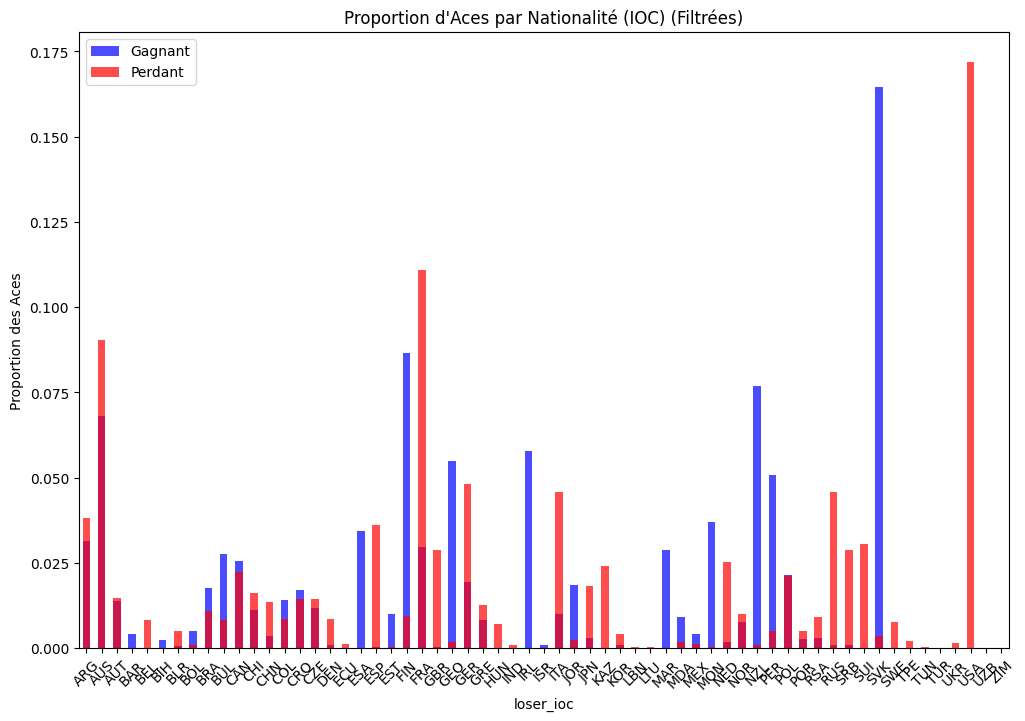

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Assurez-vous que les données sont bien sous forme numérique
df['w_ace'] = df['w_ace'].astype(float)
df['l_ace'] = df['l_ace'].astype(float)

# Calcul du nombre total d'aces par nationalité (gagnants et perdants)
total_w_aces = df.groupby('winner_ioc')['w_ace'].sum()
total_l_aces = df.groupby('loser_ioc')['l_ace'].sum()

# Calcul de la somme totale des aces pour chaque nationalité
total_aces = total_w_aces + total_l_aces

# Filtrer les nationalités ayant un nombre d'aces inférieur à un seuil
threshold = 30  # Par exemple, on garde seulement les nationalités ayant plus de 30 aces au total
filtered_nations = total_aces[total_aces > threshold].index

# Sélectionner uniquement les lignes correspondantes aux nationalités filtrées
df_filtered = df[df['winner_ioc'].isin(filtered_nations) | df['loser_ioc'].isin(filtered_nations)]

# Recalcul des proportions d'aces par nationalité
w_ace_by_nation = df_filtered.groupby('winner_ioc')['w_ace'].sum() / df_filtered.groupby('winner_ioc')['w_ace'].sum().sum()
l_ace_by_nation = df_filtered.groupby('loser_ioc')['l_ace'].sum() / df_filtered.groupby('loser_ioc')['l_ace'].sum().sum()

# Affichage en graphique
fig, ax = plt.subplots(figsize=(12, 8))
w_ace_by_nation.plot(kind='bar', label="Gagnant", ax=ax, color='blue', alpha=0.7)
l_ace_by_nation.plot(kind='bar', label="Perdant", ax=ax, color='red', alpha=0.7)

ax.set_ylabel('Proportion des Aces')
ax.set_title('Proportion d\'Aces par Nationalité (IOC) (Filtrées)')
ax.legend()

plt.xticks(rotation=45)
plt.show()


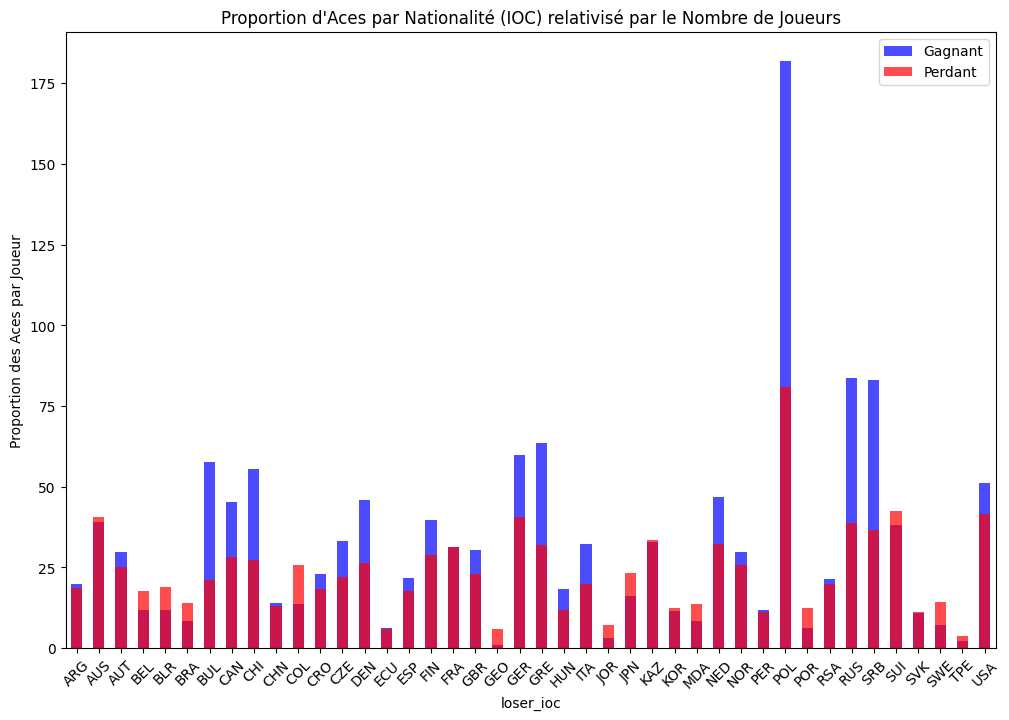

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Assurez-vous que les données sont sous forme numérique
df['w_ace'] = df['w_ace'].astype(float)
df['l_ace'] = df['l_ace'].astype(float)

# Comptage du nombre de joueurs distincts par nationalité (en fonction de winner_ioc et loser_ioc)
unique_winner_players = df.groupby('winner_ioc')['winner_id'].nunique()
unique_loser_players = df.groupby('loser_ioc')['loser_id'].nunique()

# Calcul du nombre total de joueurs distincts par nationalité (union des gagnants et des perdants)
total_players = unique_winner_players.add(unique_loser_players, fill_value=0)

# Calcul du nombre d'aces par nationalité (gagnants et perdants)
total_w_aces = df.groupby('winner_ioc')['w_ace'].sum()
total_l_aces = df.groupby('loser_ioc')['l_ace'].sum()

# Calcul des proportions d'aces par joueur
w_ace_per_player = total_w_aces / total_players
l_ace_per_player = total_l_aces / total_players

# Filtrage des nationalités avec un nombre significatif d'aces (plus de 30 aces totaux)
threshold = 30  # Seuil d'aces
filtered_nations = (total_w_aces + total_l_aces)[(total_w_aces + total_l_aces) > threshold].index

# Sélectionner les lignes correspondant aux nationalités filtrées
df_filtered = df[df['winner_ioc'].isin(filtered_nations) | df['loser_ioc'].isin(filtered_nations)]

# Recalculer les proportions d'aces par joueur pour les nationalités filtrées
w_ace_per_player_filtered = w_ace_per_player[w_ace_per_player.index.isin(filtered_nations)]
l_ace_per_player_filtered = l_ace_per_player[l_ace_per_player.index.isin(filtered_nations)]

# Affichage du graphique
fig, ax = plt.subplots(figsize=(12, 8))
w_ace_per_player_filtered.plot(kind='bar', label="Gagnant", ax=ax, color='blue', alpha=0.7)
l_ace_per_player_filtered.plot(kind='bar', label="Perdant", ax=ax, color='red', alpha=0.7)

ax.set_ylabel('Proportion des Aces par Joueur')
ax.set_title('Proportion d\'Aces par Nationalité (IOC) relativisé par le Nombre de Joueurs')
ax.legend()

plt.xticks(rotation=45)
plt.show()


<ipython-input-53-b6b96fec750f>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  w_ace_by_age = df.groupby('winner_age_group')['w_ace'].sum() / df.groupby('winner_age_group')['w_ace'].sum().sum()
<ipython-input-53-b6b96fec750f>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  l_ace_by_age = df.groupby('loser_age_group')['l_ace'].sum() / df.groupby('loser_age_group')['l_ace'].sum().sum()


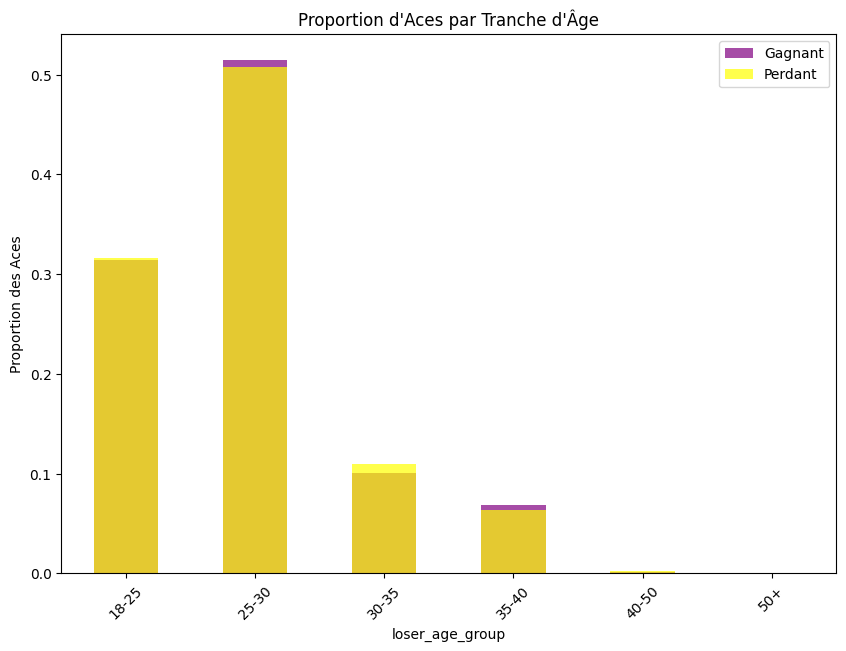

In [53]:
# Convertir l'âge en float
df['winner_age'] = df['winner_age'].astype(float)
df['loser_age'] = df['loser_age'].astype(float)

# Créer une catégorie d'âge
df['winner_age_group'] = pd.cut(df['winner_age'], bins=[18, 25, 30, 35, 40, 50, 100], labels=['18-25', '25-30', '30-35', '35-40', '40-50', '50+'])
df['loser_age_group'] = pd.cut(df['loser_age'], bins=[18, 25, 30, 35, 40, 50, 100], labels=['18-25', '25-30', '30-35', '35-40', '40-50', '50+'])

# Proportion d'aces en fonction de l'âge
w_ace_by_age = df.groupby('winner_age_group')['w_ace'].sum() / df.groupby('winner_age_group')['w_ace'].sum().sum()
l_ace_by_age = df.groupby('loser_age_group')['l_ace'].sum() / df.groupby('loser_age_group')['l_ace'].sum().sum()

# Affichage
fig, ax = plt.subplots(figsize=(10, 7))
w_ace_by_age.plot(kind='bar', label="Gagnant", ax=ax, color='purple', alpha=0.7)
l_ace_by_age.plot(kind='bar', label="Perdant", ax=ax, color='yellow', alpha=0.7)

ax.set_ylabel('Proportion des Aces')
ax.set_title('Proportion d\'Aces par Tranche d\'Âge')
ax.legend()

plt.xticks(rotation=45)
plt.show()


<ipython-input-57-cc90672e14c3>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  w_ace_by_age_group = df.groupby('winner_age_group')['w_ace'].sum()
<ipython-input-57-cc90672e14c3>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  l_ace_by_age_group = df.groupby('loser_age_group')['l_ace'].sum()


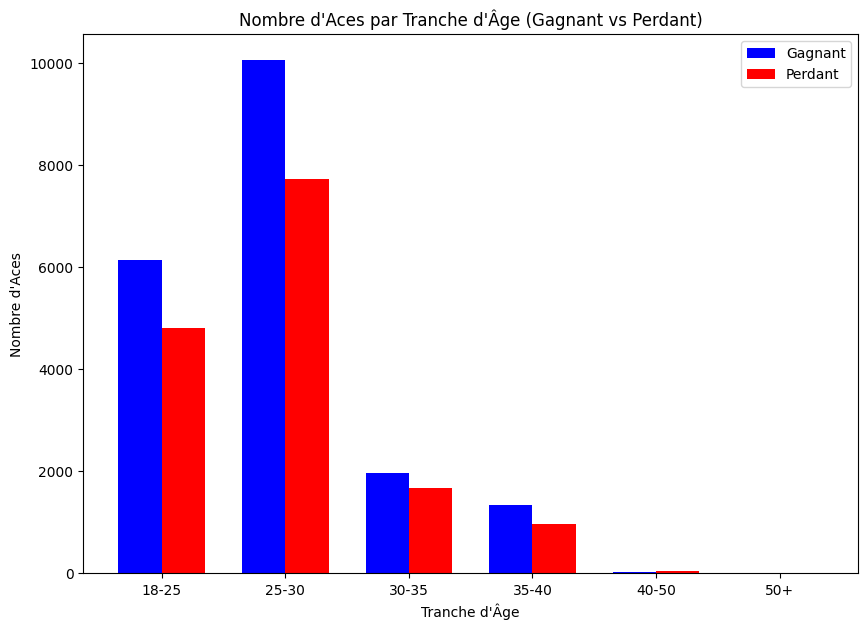

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# Assurez-vous que les données sont sous forme numérique
df['winner_age'] = df['winner_age'].astype(float)
df['loser_age'] = df['loser_age'].astype(float)

# Créer des groupes d'âges
df['winner_age_group'] = pd.cut(df['winner_age'], bins=[18, 25, 30, 35, 40, 50, 100], labels=['18-25', '25-30', '30-35', '35-40', '40-50', '50+'])
df['loser_age_group'] = pd.cut(df['loser_age'], bins=[18, 25, 30, 35, 40, 50, 100], labels=['18-25', '25-30', '30-35', '35-40', '40-50', '50+'])

# Comptage des vainqueurs et perdants par tranche d'âge
w_ace_by_age_group = df.groupby('winner_age_group')['w_ace'].sum()
l_ace_by_age_group = df.groupby('loser_age_group')['l_ace'].sum()

# Créer un index numérique pour les groupes d'âges
age_groups = ['18-25', '25-30', '30-35', '35-40', '40-50', '50+']
age_groups_numeric = list(range(len(age_groups)))  # Attribuer des indices numériques pour les groupes d'âges

# Reindexer les données pour assurer que toutes les tranches d'âge sont présentes
w_ace_by_age_group = w_ace_by_age_group.reindex(age_groups, fill_value=0)
l_ace_by_age_group = l_ace_by_age_group.reindex(age_groups, fill_value=0)

# Affichage du graphique avec les barres côte à côte
fig, ax = plt.subplots(figsize=(10, 7))

# Barres pour les gagnants, avec décalage des positions numériques
bar_width = 0.35  # Largeur des barres
w_bar = ax.bar([x - bar_width/2 for x in age_groups_numeric], w_ace_by_age_group, bar_width, label='Gagnant', color='blue')

# Barres pour les perdants, avec décalage des positions numériques
l_bar = ax.bar([x + bar_width/2 for x in age_groups_numeric], l_ace_by_age_group, bar_width, label='Perdant', color='red')

ax.set_ylabel('Nombre d\'Aces')
ax.set_title('Nombre d\'Aces par Tranche d\'Âge (Gagnant vs Perdant)')
ax.legend()

# Ajouter des étiquettes sur les axes x et y
ax.set_xlabel('Tranche d\'Âge')
ax.set_xticks(age_groups_numeric)
ax.set_xticklabels(age_groups)

plt.show()


<ipython-input-62-cd5e116e7953>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_7_6['total_aces'] = df_7_6['w_ace'] + df_7_6['l_ace']


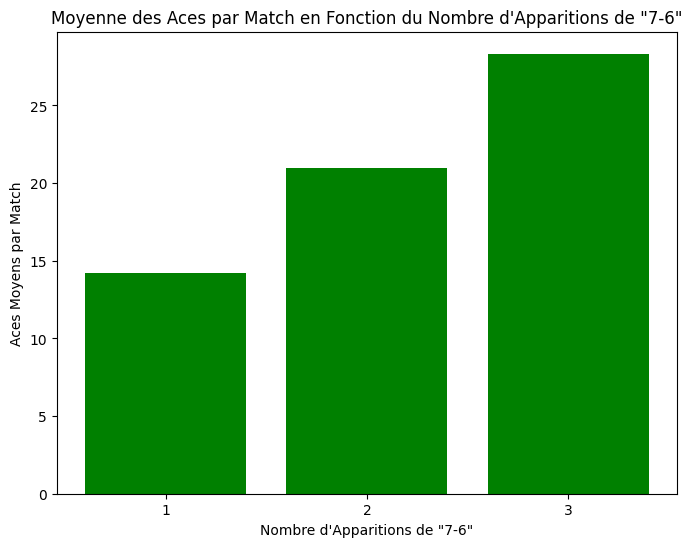

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

# Assurez-vous que les données sont sous forme numérique
df['w_ace'] = df['w_ace'].astype(float)
df['l_ace'] = df['l_ace'].astype(float)

# Créer une nouvelle colonne qui contient le nombre d'apparitions de "7-6" dans le score
df['num_7_6'] = df['score'].apply(lambda x: x.count('7-6'))

# Filtrage des matchs où "7-6" apparaît au moins une fois
df_7_6 = df[df['num_7_6'] > 0]

# Calcul du total des aces (gagnants + perdants) en fonction du nombre de "7-6"
df_7_6['total_aces'] = df_7_6['w_ace'] + df_7_6['l_ace']

# Agréger par nombre d'apparitions de "7-6" pour obtenir la somme des aces
grouped_aces = df_7_6.groupby('num_7_6')['total_aces'].sum()

# Compter le nombre de matchs pour chaque nombre d'apparitions de "7-6"
grouped_counts = df_7_6.groupby('num_7_6').size()

# Calculer la moyenne d'aces par match pour chaque nombre d'apparitions de "7-6"
aces_per_match = grouped_aces / grouped_counts

# Affichage du graphique
fig, ax = plt.subplots(figsize=(8, 6))

# Tracer la moyenne des aces par match en fonction du nombre de "7-6"
ax.bar(aces_per_match.index, aces_per_match, color='green')

ax.set_xlabel('Nombre d\'Apparitions de "7-6"')
ax.set_ylabel('Aces Moyens par Match')
ax.set_title('Moyenne des Aces par Match en Fonction du Nombre d\'Apparitions de "7-6"')

plt.xticks(aces_per_match.index)  # S'assurer que l'axe X a toutes les valeurs possibles
plt.show()


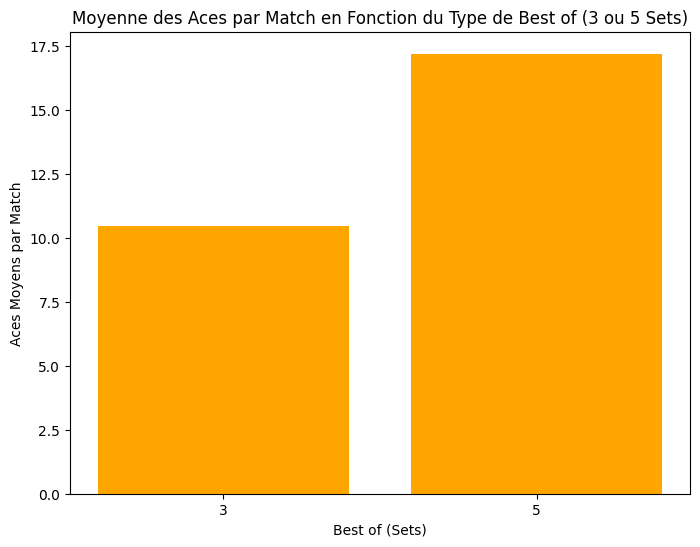

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

# Assurez-vous que les données sont sous forme numérique
df['w_ace'] = df['w_ace'].astype(float)
df['l_ace'] = df['l_ace'].astype(float)

# Calcul du total des aces (gagnants + perdants) pour chaque match
df['total_aces'] = df['w_ace'] + df['l_ace']

# Filtrage pour les matchs avec "best_of" 3 ou 5 sets
df_best_of = df[df['best_of'].isin([3, 5])]

# Agréger par le type de "best_of" (3 ou 5 sets) pour obtenir la somme des aces
grouped_aces = df_best_of.groupby('best_of')['total_aces'].sum()

# Compter le nombre de matchs pour chaque type de "best_of" (3 ou 5 sets)
grouped_counts = df_best_of.groupby('best_of').size()

# Calculer la moyenne des aces par match pour chaque type de "best_of"
aces_per_match = grouped_aces / grouped_counts

# Affichage du graphique
fig, ax = plt.subplots(figsize=(8, 6))

# Tracer la moyenne des aces par match pour chaque type de "best_of"
ax.bar(aces_per_match.index.astype(str), aces_per_match, color='orange')

ax.set_xlabel('Best of (Sets)')
ax.set_ylabel('Aces Moyens par Match')
ax.set_title('Moyenne des Aces par Match en Fonction du Type de Best of (3 ou 5 Sets)')

plt.xticks(aces_per_match.index.astype(str))  # S'assurer que l'axe X affiche correctement les valeurs
plt.show()


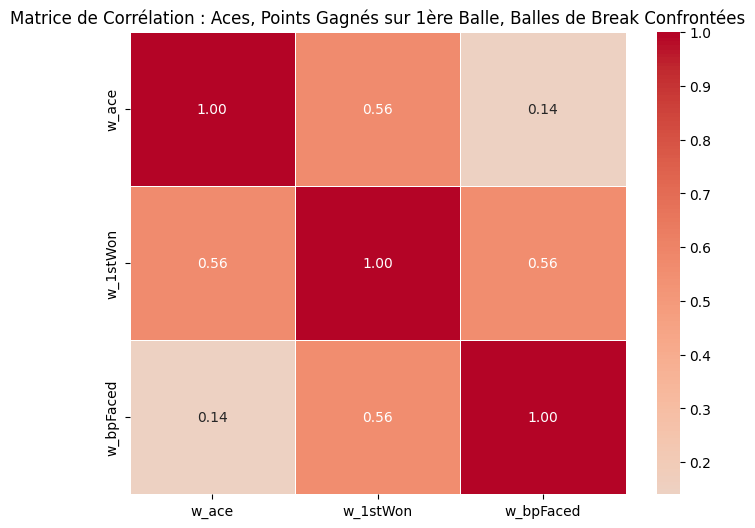

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assurez-vous que les données sont sous forme numérique
df['w_ace'] = df['w_ace'].astype(float)
df['w_1stWon'] = df['w_1stWon'].astype(float)
df['w_bpFaced'] = df['w_bpFaced'].astype(float)

# Sélectionner les variables pertinentes
data = df[['w_ace', 'w_1stWon', 'w_bpFaced']]

# Calcul de la matrice de corrélation
corr_matrix = data.corr()

# Affichage de la matrice de corrélation
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f', linewidths=0.5)
plt.title('Matrice de Corrélation : Aces, Points Gagnés sur 1ère Balle, Balles de Break Confrontées')
plt.show()


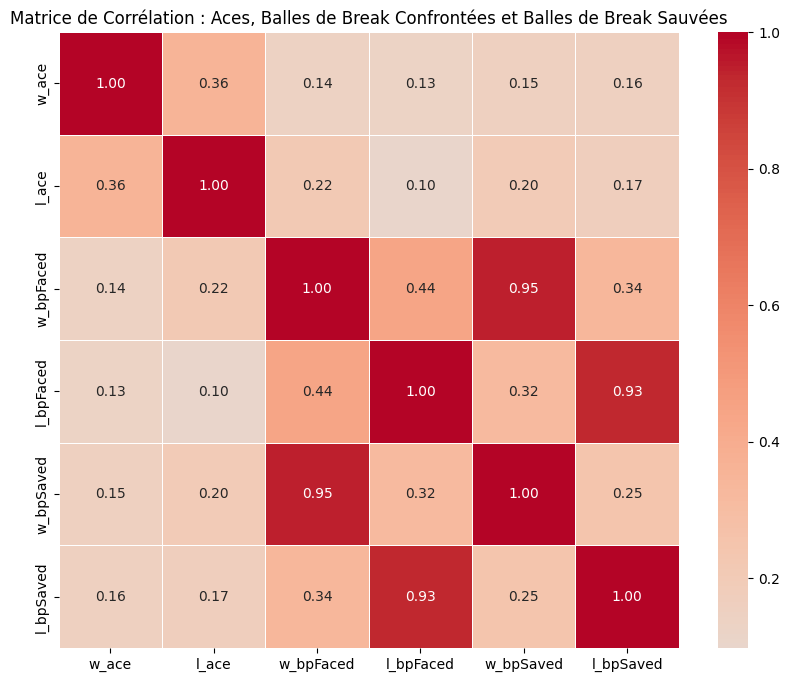

In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assurez-vous que les données sont sous forme numérique
df['w_ace'] = df['w_ace'].astype(float)
df['l_ace'] = df['l_ace'].astype(float)
df['w_bpFaced'] = df['w_bpFaced'].astype(float)
df['l_bpFaced'] = df['l_bpFaced'].astype(float)
df['w_bpSaved'] = df['w_bpSaved'].astype(float)
df['l_bpSaved'] = df['l_bpSaved'].astype(float)

# Sélectionner les colonnes pertinentes
data = df[['w_ace', 'l_ace', 'w_bpFaced', 'l_bpFaced', 'w_bpSaved', 'l_bpSaved']]

# Calcul de la matrice de corrélation
corr_matrix = data.corr()

# Affichage de la matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f', linewidths=0.5)
plt.title('Matrice de Corrélation : Aces, Balles de Break Confrontées et Balles de Break Sauvées')
plt.show()


# Nouveau test sélection de variables et ML avec + de variables

In [28]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import re

# 2️⃣ Extraire les tie-breaks du score
def count_tiebreaks(score):
    if isinstance(score, str):
        return len(re.findall(r'7-6', score))
    return 0

df["tie_breaks"] = df["score"].apply(count_tiebreaks)

# 3️⃣ Créer des ratios utiles
df["1st_serve_ratio"] = df["w_1stIn"] / df["w_svpt"]  # % de premières balles
df["1st_serve_win_ratio"] = df["w_1stWon"] / df["w_1stIn"]  # % de points gagnés sur 1ères balles
df["bp_save_ratio"] = df["w_bpSaved"] / df["w_bpFaced"]  # % de balles de break sauvées

# Remplacer les NaN par 0 (ex : si w_bpFaced = 0, alors w_bpSaved est NaN)
df.fillna(0, inplace=True)

# 4️⃣ Sélectionner les features et la cible
features = [
    "winner_ht", "winner_rank", "winner_age", "best_of", "minutes",
    "w_svpt", "1st_serve_ratio", "1st_serve_win_ratio", "bp_save_ratio",
    "tie_breaks", "surface", "winner_hand", "winner_ioc"
]
target = "w_ace"

X = df[features]
y = df[target]


In [29]:
# Identifier les types de variables
numeric_features = [
    "winner_ht", "winner_rank", "winner_age", "best_of", "minutes",
    "w_svpt", "1st_serve_ratio", "1st_serve_win_ratio", "bp_save_ratio", "tie_breaks"
]
categorical_features = ["surface", "winner_hand", "winner_ioc"]

# Convertir les colonnes catégoriques en string pour éviter l'erreur
for col in categorical_features:
    X[col] = X[col].astype(str)

# Création du préprocesseur
preprocessor = ColumnTransformer([
    ("num", Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ]), numeric_features),

    ("cat", OneHotEncoder(handle_unknown="ignore", dtype=np.float64), categorical_features)
])


<ipython-input-29-9a0469dcf311>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].astype(str)
<ipython-input-29-9a0469dcf311>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].astype(str)
<ipython-input-29-9a0469dcf311>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

In [33]:
# Création du pipeline avec Lasso
pipeline = Pipeline([
    ("preprocessing", preprocessor),
    ("lasso", LassoCV(cv=5, random_state=42))  # Recherche du meilleur alpha
])

# Entraînement du modèle
pipeline.fit(X, y)

# Récupérer les coefficients après transformation
lasso = pipeline.named_steps["lasso"]
encoded_features = pipeline.named_steps["preprocessing"].get_feature_names_out()
lasso_coeffs = pd.Series(lasso.coef_, index=encoded_features)

pd.set_option("display.max_rows", None)  # Affiche toutes les lignes
pd.set_option("display.max_columns", None)  # Affiche toutes les colonnes

# Afficher les résultats
print("Coefficients Lasso :\n", lasso_coeffs)


Coefficients Lasso :
 num__winner_ht              0.129615
num__winner_rank           -0.000000
num__winner_age             0.000000
num__best_of                0.126054
num__minutes                0.000000
num__w_svpt                 1.386724
num__1st_serve_ratio        0.000000
num__1st_serve_win_ratio    0.783009
num__bp_save_ratio          0.000000
num__tie_breaks             0.000000
cat__surface_0             -0.000000
cat__surface_Clay          -0.000000
cat__surface_Grass          0.000000
cat__surface_Hard           0.000000
cat__winner_hand_L         -0.000000
cat__winner_hand_R          0.000000
cat__winner_hand_U          0.000000
cat__winner_ioc_ARG        -0.000000
cat__winner_ioc_AUS         0.000000
cat__winner_ioc_AUT        -0.000000
cat__winner_ioc_BAR         0.000000
cat__winner_ioc_BEL         0.000000
cat__winner_ioc_BIH        -0.000000
cat__winner_ioc_BLR        -0.000000
cat__winner_ioc_BOL        -0.000000
cat__winner_ioc_BRA         0.000000
cat__winner_ioc_

In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 2️⃣ Nettoyage : Supprimer les lignes où la cible (w_ace) est manquante
df = df.dropna(subset=["w_ace"])

# 3️⃣ Sélection des variables
features = ["winner_ht", "surface", "best_of", "w_svpt", "1st_serve_win_ratio"]
target = "w_ace"

X = df[features]
y = df[target]

# 4️⃣ Encodage de la variable catégorielle "surface" avec One-Hot Encoding
X = pd.get_dummies(X, columns=["surface"], drop_first=True)

# 5️⃣ Division des données en 80% entraînement / 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6️⃣ Création et entraînement du modèle Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 7️⃣ Prédictions
y_pred = model.predict(X_test)

# 8️⃣ Évaluation du modèle
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")


Mean Absolute Error: 2.68
Root Mean Squared Error: 3.55


In [36]:
# Exemple de nouvelle donnée à prédire avec toutes les surfaces
new_match = pd.DataFrame({
    "winner_ht": [185],  # Taille du gagnant en cm
    "best_of": [3],  # Format du match (3 ou 5 sets)
    "w_svpt": [80],  # Nombre de points joués sur service
    "1st_serve_win_ratio": [0.75],  # % de points gagnés sur 1ère balle
    "surface_Clay": [0],  # Terre battue (1 = oui, 0 = non)
    "surface_Grass": [1],  # Gazon (1 = oui, 0 = non)
    "surface_Hard": [0]  # Dur (1 = oui, 0 = non)
})

# Assurer que les colonnes sont bien dans le même ordre que lors de l'entraînement
new_match = new_match[X_train.columns]

# Prédiction du nombre d'aces
predicted_aces = model.predict(new_match)[0]
print(f"Nombre d'aces prédit : {predicted_aces:.2f}")


Nombre d'aces prédit : 5.42


In [37]:
# Prendre un match réel du dataset (ex: première ligne du test set)
test_sample = X_test.iloc[[0]]

# Prédiction
predicted_aces = model.predict(test_sample)[0]
print(f"Nombre d'aces prédit pour ce match réel : {predicted_aces:.2f}")

# Valeur réelle pour comparer
actual_aces = y_test.iloc[0]
print(f"Nombre d'aces réel : {actual_aces}")


Nombre d'aces prédit pour ce match réel : 5.65
Nombre d'aces réel : 2.0


# Un autre type de ML

In [38]:
from xgboost import XGBRegressor

model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}")


MAE: 2.68, RMSE: 3.53


In [39]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.1)  # Ajuster alpha pour contrôler la régularisation
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}")


MAE: 3.08, RMSE: 4.08


In [40]:
from sklearn.neural_network import MLPRegressor

model = MLPRegressor(hidden_layer_sizes=(64, 32), activation='relu', max_iter=500, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}")


MAE: 3.15, RMSE: 4.23


In [42]:
from sklearn.svm import SVR

model = SVR(kernel='rbf', C=10, gamma='scale')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}")

MAE: 3.10, RMSE: 4.14
